# Bike Sharing Case Study


### Problem Statement: 

##### The bike sharing company suffered great loss in the ongoing pandemic and in order to make profit, they want to understand the variables which are significant to predict the demand for shared bikes. Also, how well those variables describe the bike demands.

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [376]:
# Read the csv file provided
bikes_df = pd.read_csv('day.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1. Data Exploration

In [377]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [378]:
bikes_df.shape

(730, 16)

In [379]:
# Check for the duplicates
bikes_df[bikes_df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [380]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### __Initial Analysis__ :

1. Columns such as dteday, yr, mnth seems redundant and therefore, dropping 'yr' and 'mnth'

2. We can set the instant as the index as it's a unique identifier
3. Lets encode the season, weekday, woking day, weathersit for better visualization and understanding of categorical variables
4. We will keep casual and registered to understand the ratio of users while performing visualizations, but we might be drop them while creating model as the cnt is sum of casual users and registered users for bike rentals.
5. Numeric variables will be helpful as well in analysing the data and its distribution such as windspeed, hum (humidity), temp, atemp(feels like temp).
6. There are no null and duplicate values that needs to be taken care of.


In [381]:
bikes_df = bikes_df.set_index('instant')

In [382]:
bikes_df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


<p> As per the records above the first row is a weekday 6 and not a working day, similarly second row is 0th weekday and non working day
 Whereas the third row depicts weekday and a working day, so its safe to assume that the 0 - Sunday, 1 - Monday, ..., 6 - Saturday </p>

In [383]:
# We can create the dictionary to iterate for categorical encoding for the visualiation (as per the data dictionary)

enc_dict = { 'season': { 1:'spring', 2:'summer', 3:'fall', 4:'winter'},
            'weekday' : {0:'Sunday', 1:'Monday', 2:'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
            'weathersit' : {1: 'Clear', 2: 'Mist and Cloudy', 3: 'Light Rain/ Snow', 4: 'Heavy Rain/ Snow'}}

In [384]:
for item in enc_dict.keys():
    bikes_df[item] = bikes_df[item].map(enc_dict[item])

In [385]:
bikes_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,Saturday,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,Sunday,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [386]:
# Extract month and year, at the same time drop the column mnth and yr

bikes_df['month'] = pd.to_datetime(bikes_df['dteday']).dt.month_name()
bikes_df['year'] = pd.to_datetime(bikes_df['dteday']).dt.year

In [387]:
bikes_df.drop(["dteday","mnth"], axis=1, inplace=True)

In [388]:
bikes_df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
instant,,,,,,,,,,,,,,,
1,spring,0,0,Saturday,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018
2,spring,0,0,Sunday,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018
3,spring,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018
4,spring,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018
5,spring,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018


## 2. Data Visualization

__Questions:__
1. Which day of the week witnesses the highest bike sharing count?
2. In which season does bike rental experience the highest demand?
3. Does the weather impact the bike rental?
4. Are the sales highest on weekends rather than weekdays?
5. Is there a high demand for bike rentals on holidays?
6. Has there been an increase in bike demand over the year?
7. Which months witnessed the highest and lowest bike rent counts?

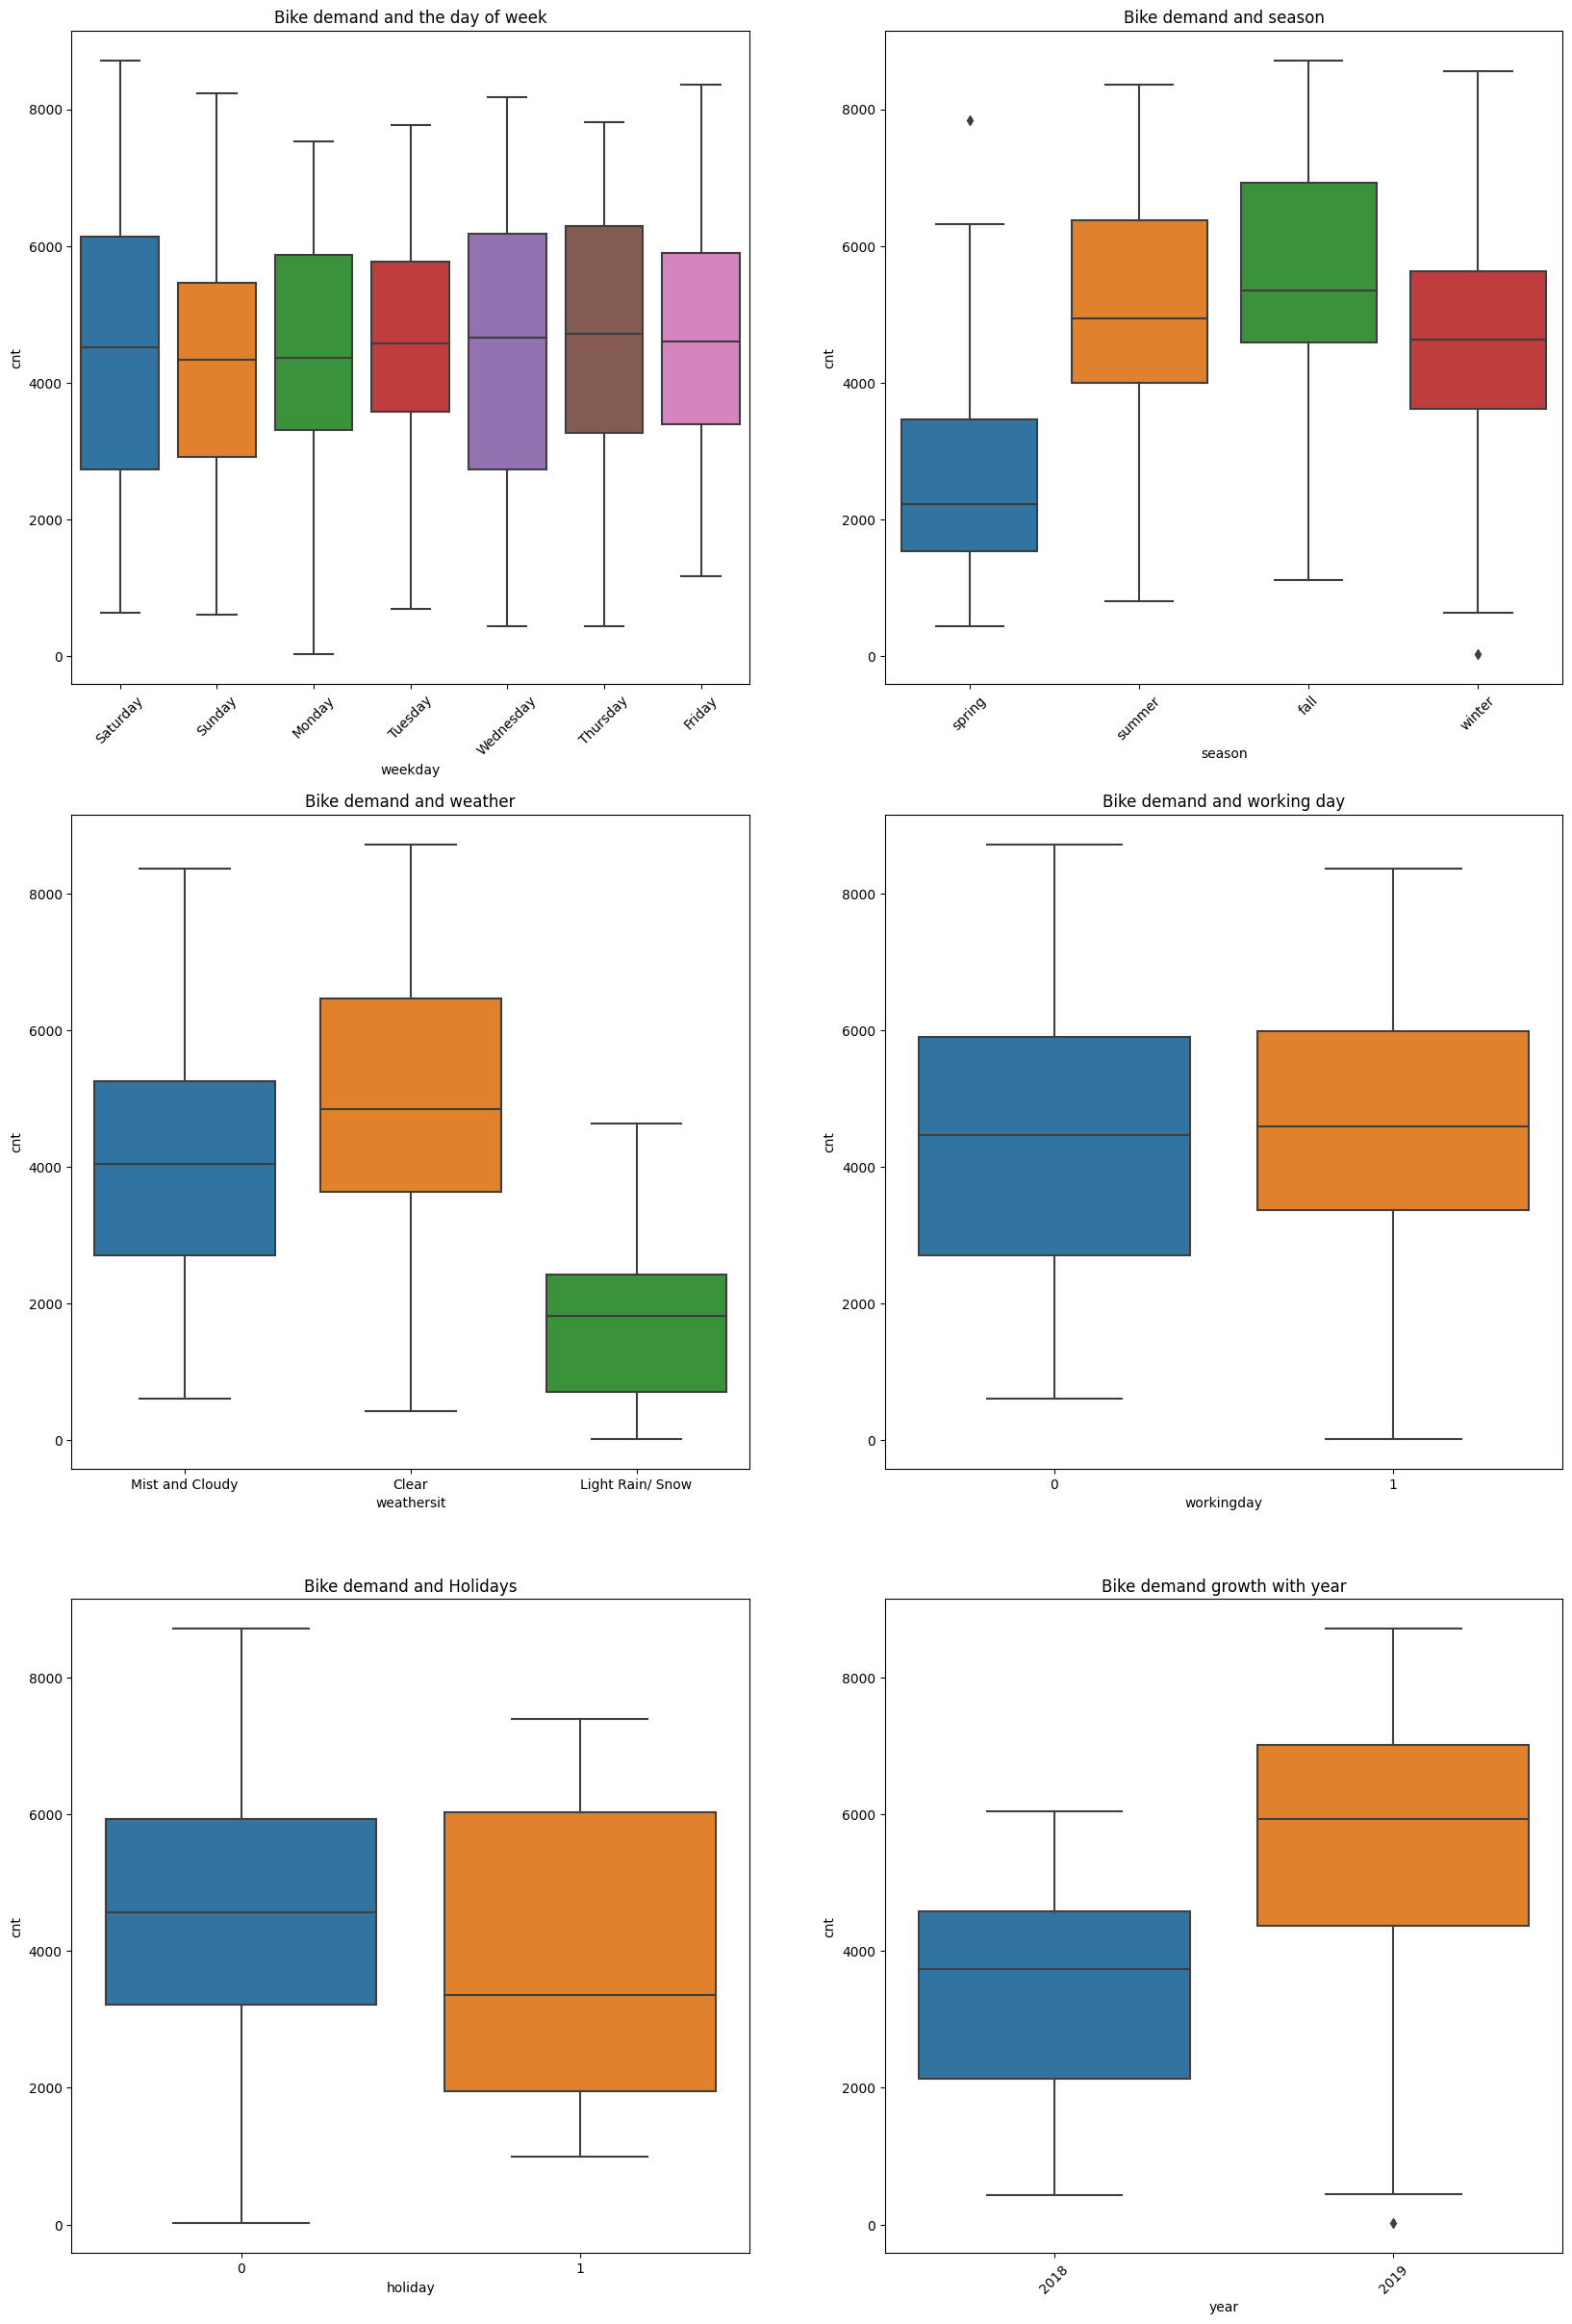

In [389]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
plt.xticks(rotation = 45)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df).set_title('Bike demand and the day of week')
plt.subplot(3,2,2)
plt.xticks(rotation = 45)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df).set_title('Bike demand and season')
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df).set_title('Bike demand and weather')
plt.subplot(3,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df).set_title('Bike demand and working day')
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df).set_title('Bike demand and Holidays')
plt.subplot(3,2,6)
sns.boxplot(x = 'year', y = 'cnt', data = bikes_df).set_title('Bike demand growth with year')
plt.xticks(rotation = 45)
plt.show()

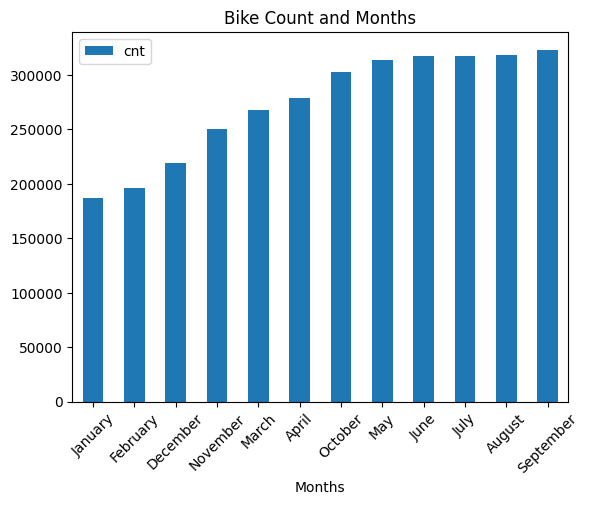

In [390]:
bikes_df.groupby('month').sum().sort_values('cnt', ascending= True)[['cnt']].plot.bar()
plt.title('Bike Count and Months')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.show()

### __Observations__

1. There is a high demand for bikes on Saturdays.
2. People are more likely to rent shared bikes in the fall and least in the spring.
3. Clear or partly cloudy weather is the preferred weather for bike rentals.
4. Working days have no significant impact, but if we closely observe, biking is preferred on non-working days.
5. There are fewer bikes rented on holidays.
6. There has been a rise in demand for shared bikes in 2019
7. The month of September witnesses the highest number of bike rentals, whereas there is less demand in the months of January and February.

<Figure size 640x480 with 0 Axes>

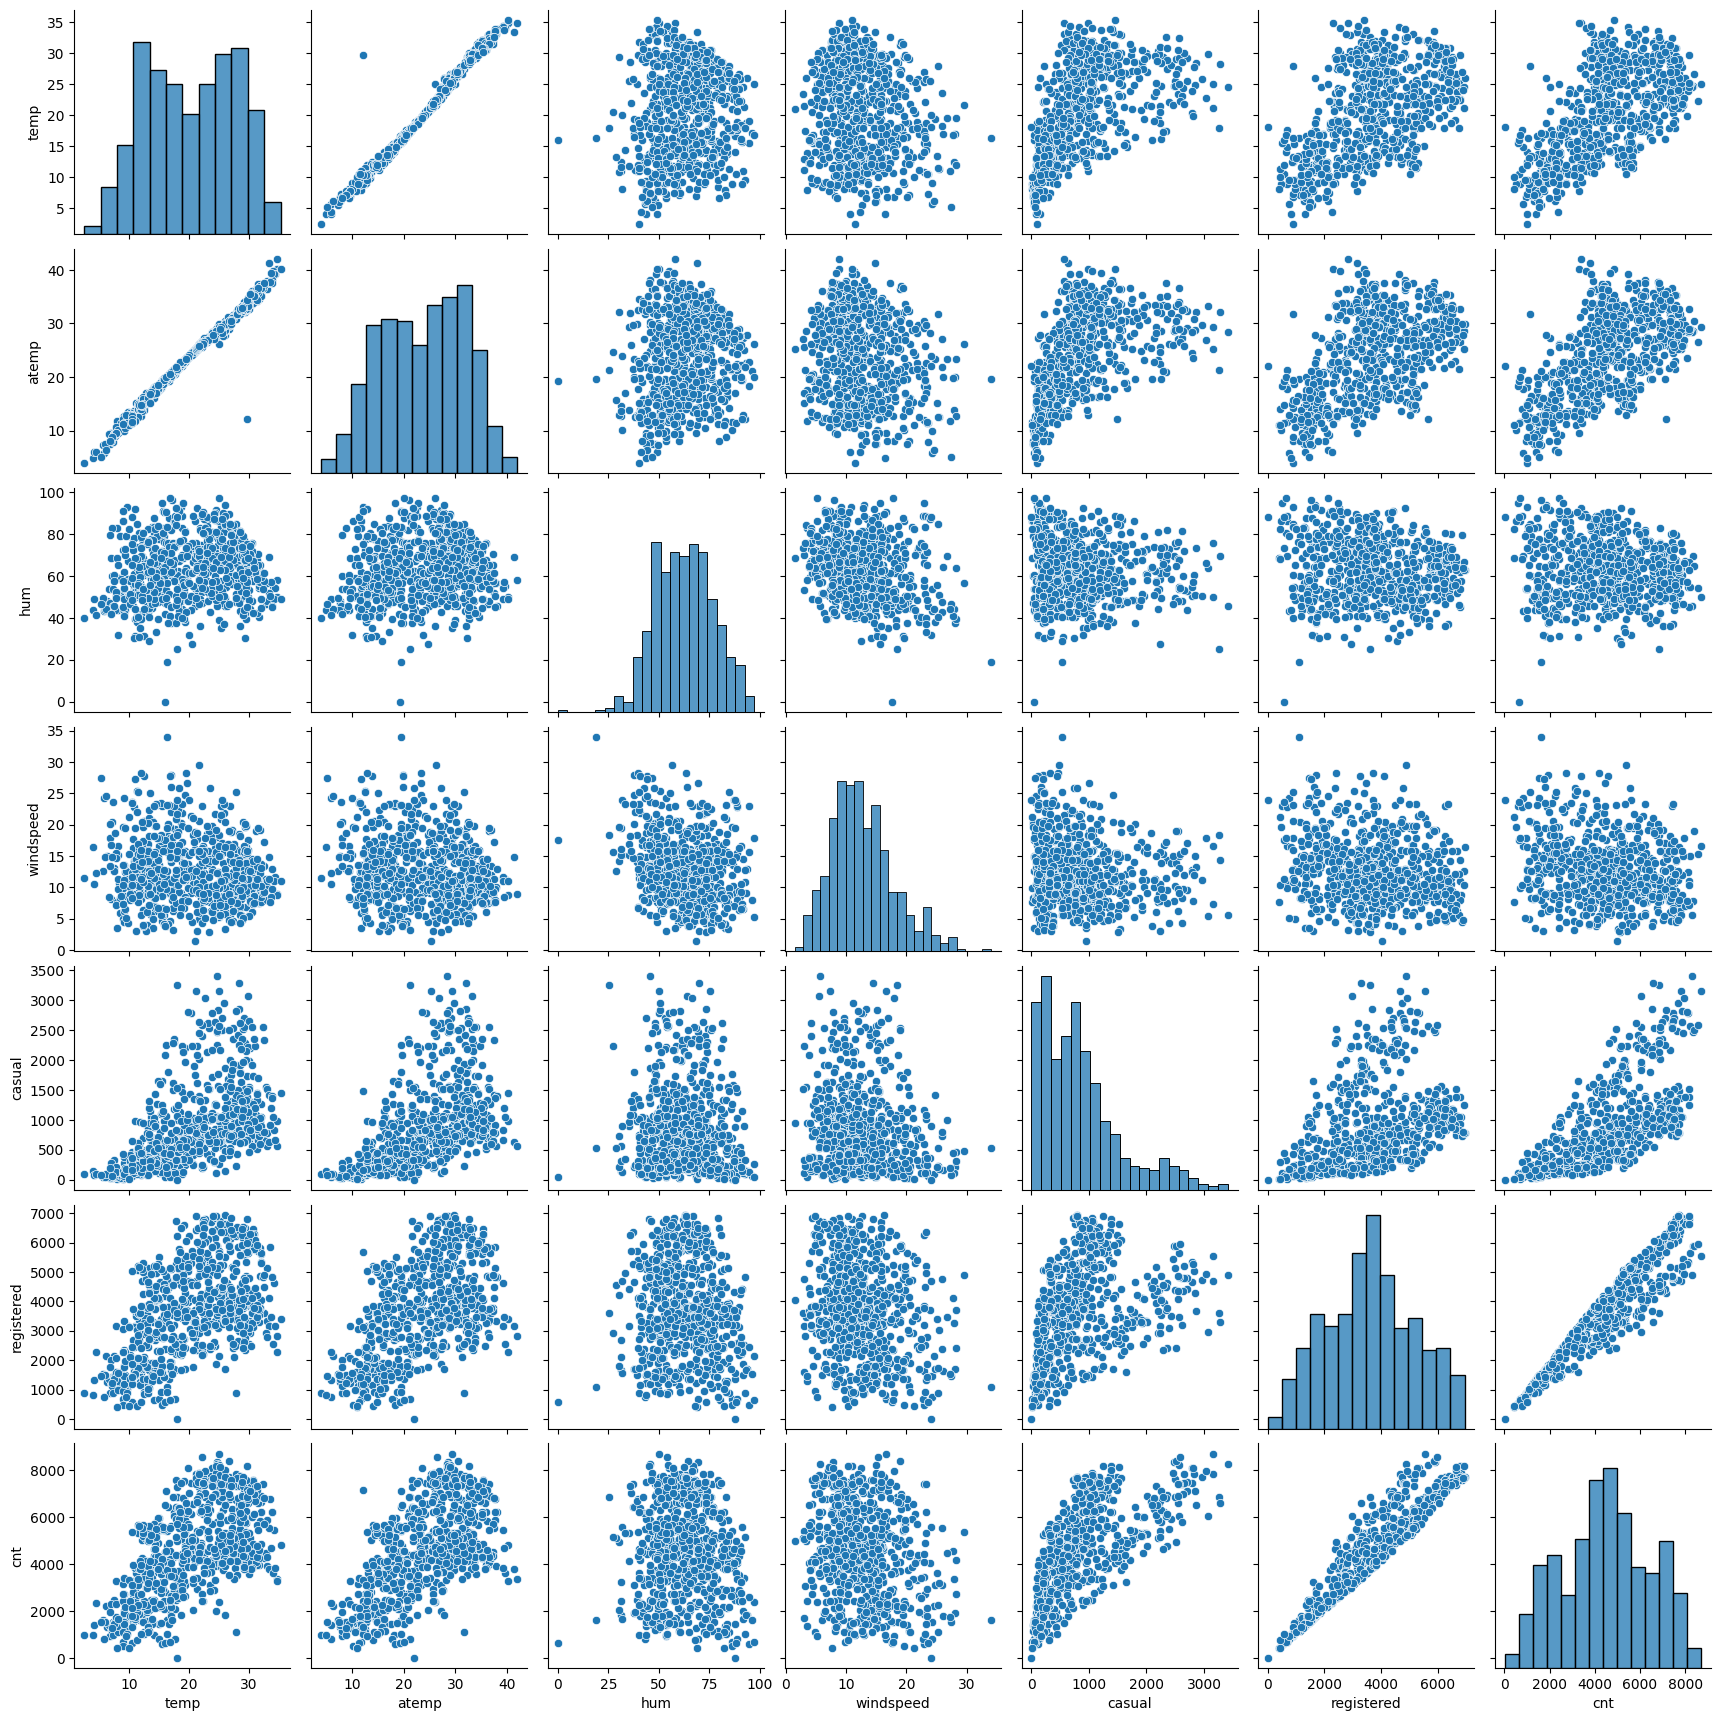

In [391]:
# Lets visualize and check correlation between the numeric variables

num_vars = bikes_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]
plt.figure()
sns.pairplot(num_vars)
plt.show()

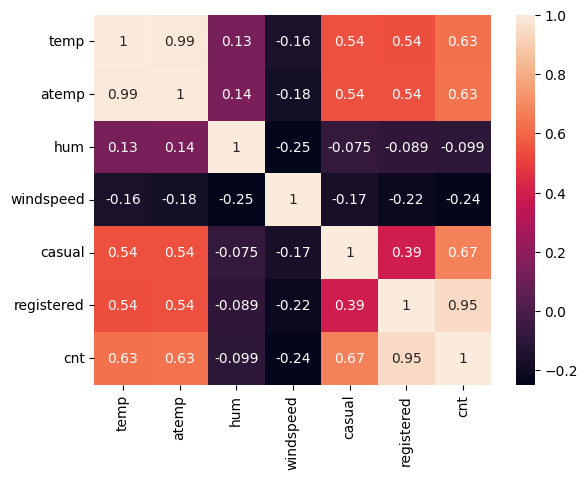

In [392]:
plt.figure()
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

#### __Observation:__ temp and atemp has high correlation of about 0.99. They show linear relationship as in the pairplots above.

### Encoding all the variables using dummy approach

In [393]:
def getdummies(col_name):
    return pd.get_dummies(bikes_df[col_name], drop_first= True)

In [394]:
def conv_dummies(df, col):
    dummy_df = pd.get_dummies(df[col], drop_first='True')
    df.drop(col, axis=1, inplace=True)
    return pd.concat([df,dummy_df], axis=1)

bikes_df = conv_dummies(bikes_df,'season')
bikes_df = conv_dummies(bikes_df,'weekday')
bikes_df = conv_dummies(bikes_df,'weathersit')
bikes_df = conv_dummies(bikes_df,'month')

In [395]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   casual            730 non-null    int64  
 8   registered        730 non-null    int64  
 9   cnt               730 non-null    int64  
 10  year              730 non-null    int64  
 11  spring            730 non-null    uint8  
 12  summer            730 non-null    uint8  
 13  winter            730 non-null    uint8  
 14  Monday            730 non-null    uint8  
 15  Saturday          730 non-null    uint8  
 16  Sunday            730 non-null    uint8  
 1

In [396]:
# Lets drop the casual and registered too as cnt = casual users + registered users
bikes_df.drop(['casual','registered', 'year'], axis=1, inplace=True)

In [397]:
bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


### 3. Data preprocessing

In [398]:
scaler = MinMaxScaler()

In [399]:
# Before scaling we are going to split the data 
bikes_df_train, bikes_df_test = train_test_split(bikes_df, train_size= 0.7, test_size= 0.3, random_state= 100)

In [400]:
# Scale all the numeric variables such as temp, atemp, hum, windspeed and cnt. 
num_variables = ['temp','atemp','hum','windspeed','cnt']
bikes_df_train[num_variables] = scaler.fit_transform(bikes_df_train[num_variables])

In [401]:
bikes_df_test[num_variables] = scaler.transform(bikes_df_test[num_variables])

In [402]:
bikes_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Let's seperate the predictor with target variable

In [403]:
y_train = bikes_df_train.pop('cnt')
X_train = bikes_df_train

In [404]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light Rain/ Snow',
       'Mist and Cloudy', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [405]:
rfe_features = RFE(estimator = LinearRegression(), n_features_to_select = 18)
rfe_features = rfe_features.fit(X = X_train, y = y_train)

In [406]:
list(zip(X_train.columns, rfe_features.support_, rfe_features.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 12),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 6),
 ('Wednesday', False, 9),
 ('Light Rain/ Snow', True, 1),
 ('Mist and Cloudy', True, 1),
 ('August', False, 7),
 ('December', True, 1),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('March', False, 10),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1)]

In [407]:
X_train.columns[~rfe_features.support_]

Index(['atemp', 'spring', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'February', 'June', 'March', 'October'],
      dtype='object')

In [408]:
X_train = X_train[X_train.columns[rfe_features.support_]]

In [409]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,winter,Saturday,Sunday,Light Rain/ Snow,Mist and Cloudy,December,January,July,May,November,September
instant,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0,0,0
577,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0
427,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,0,0,0,0,0,0
729,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.504508,0.188475,1,0,1,0,0,1,0,0,0,0,0,0


### Next Step: Create the model summary and use VIF to eliminate the variables

In [410]:
# Its better to create a function of regression model and vif rather than rewriting all over again
def get_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif = vif.set_index('Features')
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending= False)
    print(vif)

In [411]:
def build_model(X_new, y_train):
    X_new_lm = sm.add_constant(X_new)
    model = sm.OLS(y_train, X_new_lm).fit()
    print(model.summary())
    get_vif(X_new)

In [413]:
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.95e-182
Time:                        19:25:53   Log-Likelihood:                 503.89
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     492   BIC:                            -895.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1563      0.023  

__Comment:__ <p>May variable seems to have a high p value and thus, removing it</p>

<p>We will keep the significance level of 0.05 and the VIF below 5. We will repeat this process until we meet this requirement to claim its our final model</p>

In [414]:
X_train = X_train.drop('holiday', axis = 1)

In [415]:
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.95e-182
Time:                        19:25:58   Log-Likelihood:                 503.89
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     492   BIC:                            -895.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1387      0.038  

In [416]:
X_train = X_train.drop('hum', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          9.37e-181
Time:                        19:27:23   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -960.4
Df Residuals:                     493   BIC:                            -888.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0599      0.031  

In [417]:
X_train = X_train.drop('Sunday', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.87e-181
Time:                        19:28:02   Log-Likelihood:                 496.21
No. Observations:                 510   AIC:                            -960.4
Df Residuals:                     494   BIC:                            -892.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0930      0.020  

In [418]:
X_train = X_train.drop('May', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          3.05e-182
Time:                        19:28:59   Log-Likelihood:                 495.39
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     495   BIC:                            -897.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0912      0.020  

In [419]:
X_train = X_train.drop('November', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          4.27e-183
Time:                        19:29:36   Log-Likelihood:                 494.69
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     496   BIC:                            -902.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0883      0.020  

In [420]:
X_train = X_train.drop('December', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          4.78e-184
Time:                        19:30:02   Log-Likelihood:                 494.17
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     497   BIC:                            -907.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0843      0.020  

In [421]:
X_train = X_train.drop('January', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.2
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.69e-184
Time:                        19:30:25   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     498   BIC:                            -910.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0730      0.019  

In [422]:
X_train = X_train.drop('July', axis = 1)
build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          6.30e-185
Time:                        19:31:15   Log-Likelihood:                 490.60
No. Observations:                 510   AIC:                            -959.2
Df Residuals:                     499   BIC:                            -912.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0731      0.019  

In [423]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

This is our final model with R-squared of __0.826__ and adjusted R-squared be __0.823__, which is a pretty good model.
Now, let's predict on the training set and check if the assumptions of linear regression are satisfied.</p>

In [424]:
y_train_pred = lm.predict(X_train)

Text(0.5, 0.98, 'Error terms distribution')

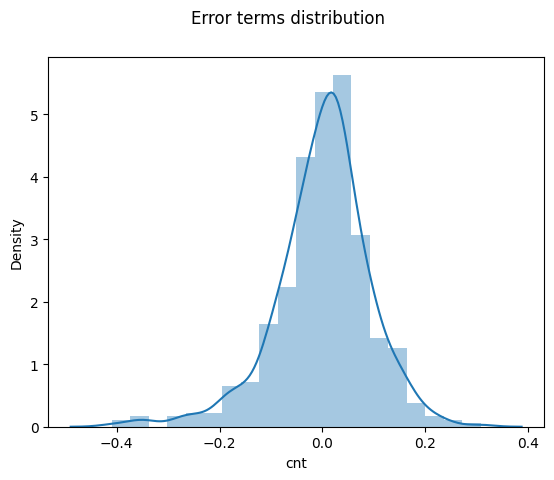

In [425]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins= 20)
fig.suptitle('Error terms distribution')

#### Error terms have a normal distribution and it lies near 0. Hence, the assumptions of linear regression are true.

In [426]:
y_test = bikes_df_test.pop('cnt')
X_test = bikes_df_test

In [427]:
final_features = X_train.columns
X_test = X_test[final_features]

In [428]:
y_test_pred = lm.predict(X_test)

__Check if there is a pattern in test and residual__

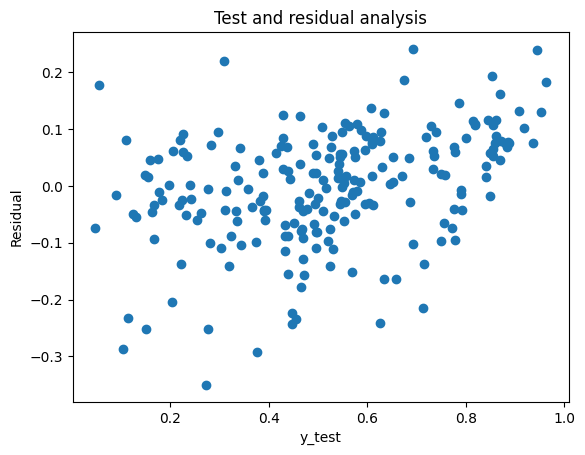

In [429]:
plt.scatter(y_test,  (y_test - y_test_pred))
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.title('Test and residual analysis')
plt.show()

### No visible pattern is visible and hence it is safe to say we have constant variance.

## Model Evaluation

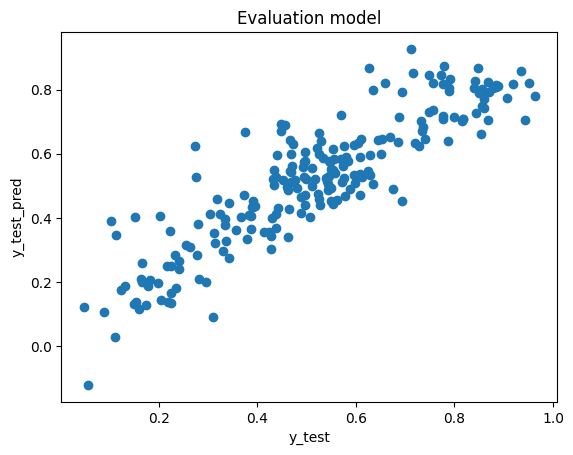

In [431]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Evaluation model')
plt.show()

### Equation for the best fitted line is:

$ cnt = 0.2331  \times  yr + + 0.0550  \times  workingday + 0.5672  \times  temp  - 0.1599 \times windspeed + 0.0791 \times summer + 0.1274 \times winter + 0.0676 \times Saturday - 0.2749 \times Light Rain/Snow - 0.0800 \times Mist and Cloudy + 0.0716 \times September $

## Checking the R2_score, MSE and MAE

In [433]:
print('r2_score: ', r2_score(y_test, y_test_pred))
print('MSE: ', mean_squared_error(y_test, y_test_pred))
print('MAE: ', mean_absolute_error(y_test, y_test_pred))

r2_score:  0.7876277938782021
MSE:  0.010086789558413346
MAE:  0.07812246521022499


### __Conclusion:__ 
<p>This model can further be improved by iterating over the features. At this point, the model has a decent accuracy.</p>
<p>Further improvement: We can iterate over features while using RFE to improve the model accuracy.</p> 